# 小鹤双拼方案
![](https://help.flypy.com/assets/img/hejp.png)

In [84]:
PINYIN_TO_XIAOHE = {
    'iu': 'q',
    'ei': 'w',
    'uan': 'r', 
    'ue': 't', 
    've': 't', 
    'un': 'y', 
    'uo': 'o', 
    'ie': 'p', 
    'ong': 's', 
    'iong': 's', 
    'ai': 'd', 
    'en': 'f', 
    'eng': 'g', 
    'ang': 'h', 
    'an': 'j', 
    'ing': 'k', 
    'uai': 'k', 
    'iang': 'l', 
    'uang': 'l', 
    'ou': 'z', 
    'ia': 'x', 
    'ua': 'x', 
    'ao': 'c', 
    'ui': 'v', 
    'in': 'b', 
    'iao': 'n', 
    'ian': 'm',

    'sh': 'u', 
    'ch': 'i', 
    'zh': 'v',

    'a': 'aa',
    'er': 'er', 
    'en': 'en', 
    'o': 'oo', 
    'n': 'en', 

}

VOWELS = ['a', 'o', 'e', 'i', 'u', 'v']

In [85]:
#!pip install pypinyin
from pypinyin import lazy_pinyin
import matplotlib.pyplot as plt

In [86]:
test_string = "天雨流芳"
print(lazy_pinyin(test_string))

['tian', 'yu', 'liu', 'fang']


In [87]:
def pinyin2xiaohe(string: str):
    for char in string:
        if char in VOWELS:
            leading_vowel = char
            break
    leading_vowel_index = string.index(leading_vowel)
    pre = string[:leading_vowel_index]
    post = string[leading_vowel_index:]
    if len(pre) == 2:
        pre = PINYIN_TO_XIAOHE[pre]
    if len(post) > 1:
        post = PINYIN_TO_XIAOHE[post]
    return pre + post  

In [88]:
for char in test_string:
    xiaohe = pinyin2xiaohe(lazy_pinyin(char)[0])
    print(xiaohe, end=', ')

tm, yu, lq, fh, 

In [89]:
def string2xiaohe(string: str):
    xiaohe_list = []
    for char in string:
        try:
            py = lazy_pinyin(char)[0]
            xiaohe_list.append(pinyin2xiaohe(py))
        except:
            xiaohe_list.append(char)
    return xiaohe_list

In [90]:
long_test_string = "天若有情天亦老，人间正道是沧桑。"
print(string2xiaohe(long_test_string))

['tm', 'ro', 'yz', 'qk', 'tm', 'yi', 'lc', '，', 'ren', 'jm', 'vg', 'dc', 'ui', 'ch', 'sh', '。']


## 统计按键使用分布

In [91]:
with open('海底两万里.txt', 'r', encoding='utf8') as f:
    s = f.read()
print(s[:200])

《海底两万里》
作者：[法]儒勒·凡尔纳

第一章　飞走的暗礁

人们一定还记得1866年海上发生的一件离奇的、神秘的、无法解释的怪事。且不说当时哄动沿海居民和世界舆论的各种传闻，这里只说一般航海人员特别激动的心情。欧美的进出口商人、船长和船主、各国的海军官佐以及这两大洲的各国政府都非常注意这件事。

这事大体是这样：不久以前，好些大船在海上碰见了一一个“庞然大物”，一个很长的物体，形状很像纺锤，


In [92]:
s = "".join(list(filter(lambda c: '\u4e00' <= c <= '\u9fff', s)))
print(s[:200])

海底两万里作者法儒勒凡尔纳第一章飞走的暗礁人们一定还记得年海上发生的一件离奇的神秘的无法解释的怪事且不说当时哄动沿海居民和世界舆论的各种传闻这里只说一般航海人员特别激动的心情欧美的进出口商人船长和船主各国的海军官佐以及这两大洲的各国政府都非常注意这件事这事大体是这样不久以前好些大船在海上碰见了一一个庞然大物一个很长的物体形状很像纺锤有时发出磷光它的体积比鲸鱼大得多行动起来也比鲸鱼快得多关于这个东西


In [93]:
result_list = string2xiaohe(s)
print(result_list[:10])
xiaohe_alpha = "".join(result_list)

['hd', 'di', 'll', 'wj', 'li', 'zo', 've', 'fa', 'ru', 'lw']


In [105]:
rlt = {} 
for i in xiaohe_alpha: 
    if i not in rlt.keys():
         rlt[i] = xiaohe_alpha.count(i)
rlt= sorted(rlt.items(), key=lambda d:d[1], reverse = True)
print(rlt)

[('i', 38223), ('d', 38045), ('e', 37362), ('u', 32920), ('y', 19962), ('h', 19150), ('j', 19108), ('n', 18706), ('v', 18319), ('l', 16831), ('m', 16523), ('w', 15477), ('z', 15058), ('o', 13371), ('b', 13149), ('x', 12483), ('k', 11805), ('g', 11790), ('s', 11745), ('a', 11730), ('c', 10171), ('r', 9685), ('t', 9443), ('q', 8784), ('p', 4333), ('f', 3966), ('嗯', 3)]


<BarContainer object of 27 artists>

C:\Users\Cocca-PC\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21999 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Cocca-PC\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 21999 missing from current font.
  font.set_text(s, 0, flags=flags)


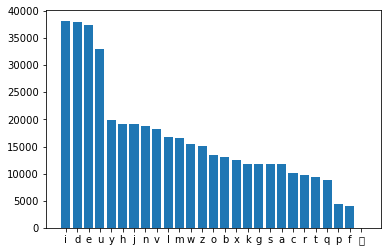

In [113]:
x, y = list(zip(*rlt))
plt.bar(x, y)